In [66]:
import random
import csv


def f(x1, x2):
    return x1 + x2


x1_min = -10.0
x2_min = -10.0
x1_max = 10.0
x2_max = 10.0

with open('data/dataset.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x1", "x2", "y"])
    for i in range(0, 10000):
        x1 = random.uniform(x1_min, x1_max)
        x2 = random.uniform(x2_min, x2_max)
        y = f(x1, x2) + random.uniform(-0.1, 0.1)
        writer.writerow([x1, x2, y])


In [98]:
import csv
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale

data = []
with open('data/dataset.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for row in reader:
        float_row = list(map(float, row))
        data.append(float_row)

npdata = np.array(data)
total = len(npdata)

train_size = int(0.6 * total)
valid_size = int(0.2 * total)
test_size = int(0.2 * total)

index_1 = 0
index_2 = train_size
index_3 = train_size + valid_size
index_4 = train_size + valid_size + test_size

train_x = npdata[index_1:index_2, :2]
train_y = npdata[index_1:index_2, 2:]

valid_x = npdata[index_2:index_3, :2]
valid_y = npdata[index_2:index_3, 2:]

test_x = npdata[index_3:index_4, :2]
test_y = npdata[index_3:index_4, 2:]

print("data", len(data))
print("train", len(train_x), len(train_y))
print("test", len(test_x), len(test_y))
print("valid", len(valid_x), len(valid_y))


data 10000
train 6000 6000
test 2000 2000
valid 2000 2000


0 53.206759230731706
100 35.487587564380085
200 23.66971200227025
300 15.787728402073038
400 10.530803664858864
500 7.024672888266272
600 4.686241763131585
700 3.1266132142690926
800 2.0864107169243176
900 1.3926419704904076
1000 0.9299289767506447
1100 0.6213198362314409
1200 0.4154911028368771
1300 0.2782123433619783
1400 0.18665338998458483
1500 0.1255875376308523
1600 0.08485924930663742
1700 0.05769523026565448
1800 0.0395779906757109
1900 0.027494562526708264
2000 0.0194354274214846
2100 0.014060323735851574
2200 0.010475354819284487
2300 0.008084330009341688
2400 0.006489615625263063
2500 0.005426006921110327
2600 0.004716623560281702
2700 0.004243493810209519
2800 0.003927935470323971
2900 0.003717470794109


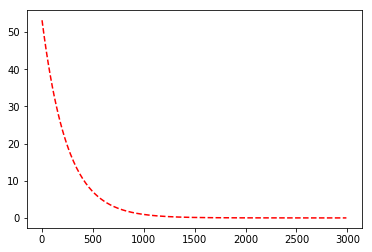

Validation error = 0.027836396433169767 

Test error = 0.11336658395877398 



In [72]:
tf.reset_default_graph()

w = tf.Variable(tf.truncated_normal([2, 1], mean=0.0, stddev=1.0, dtype=tf.float64), name="w")
b = tf.Variable(tf.zeros(1, dtype=tf.float64), name="b")


def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w, name="matmul"), name="prediction")
    error = tf.reduce_mean(tf.square(y - predictions), name="error")
    return [predictions, error]


y, cost = calc(train_x, train_y)
# Feel free to tweak these 2 values:
learning_rate = 0.001
epochs = 3000
points = [[], []]  # You'll see later why I need this

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(init)
    train_writer = tf.summary.FileWriter('logs/simple_regression/train', sess.graph)
    for i in list(range(epochs)):
        sess.run(optimizer)
        if i % 10 == 0.:
            points[0].append(i + 1)
            points[1].append(sess.run(cost))
        if i % 100 == 0:
            print(i, sess.run(cost))
    plt.plot(points[0], points[1], 'r--')
    # plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_x, valid_y)[1]
    print('Validation error =', sess.run(valid_cost), '\n')
    test_cost = calc(test_x, test_y)[1]
    print('Test error =', sess.run(test_cost), '\n')


In [75]:
with tf.Session() as sess:
    sess.run(init)
    output_graph_def = tf.graph_util.convert_variables_to_constants(
        sess,  # The session is used to retrieve the weights
        tf.get_default_graph().as_graph_def(),  # The graph_def is used to retrieve the nodes 
        ["prediction"]
    )

    output_graph = "models/simple_regression/frozen_model.pb"
    with tf.gfile.GFile(output_graph, "wb") as f:
        f.write(output_graph_def.SerializeToString())


INFO:tensorflow:Froze 2 variables.
INFO:tensorflow:Converted 2 variables to const ops.


0 229.35258
100 0.0037079353
200 0.0033633988
300 0.0033411735
400 0.00332628
500 0.003316292
600 0.0033095968
700 0.0033051115
800 0.0033021015
900 0.0033000854
1000 0.0032987348
1100 0.0032978274
1200 0.0032972195
1300 0.0032968114
1400 0.003296538
1500 0.003296355
1600 0.0032962337
1700 0.0032961515
1800 0.0032960968
1900 0.0032960593
2000 0.0032960344
2100 0.0032960167
2200 0.003296007
2300 0.0032959988
2400 0.0032959932
2500 0.0032959913
2600 0.00329599
2700 0.0032959862
2800 0.0032959855
2900 0.0032959862
3000 0.0032959848
3100 0.0032959846
3200 0.0032959844
3300 0.003295984
3400 0.0032959837
3500 0.0032959837
3600 0.0032959846
3700 0.0032959837
3800 0.0032959844
3900 0.0032959848
4000 0.0032959844
4100 0.0032959848
4200 0.0032959844
4300 0.0032959837
4400 0.0032959837
4500 0.0032959844
4600 0.0032959837
4700 0.0032959837
4800 0.003295984
4900 0.0032959837


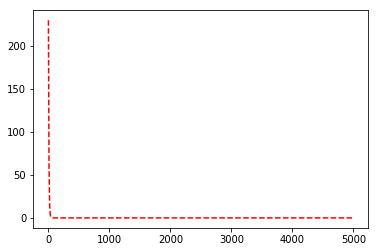

Test error 0.0033500206
Validation error 0.0033087553
INFO:tensorflow:Froze 2 variables.
INFO:tensorflow:Converted 2 variables to const ops.


In [99]:
tf.reset_default_graph()

x = tf.placeholder(dtype=tf.float32, shape=(None, 2), name="input/x")
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="input/y")
w = tf.Variable(tf.truncated_normal([2, 1], mean=0.0, stddev=1.0, dtype=tf.float32), name="w")
b = tf.Variable(tf.zeros(1, dtype=tf.float32), name="b")
predictions = tf.add(b, tf.matmul(x, w), name="output/prediction")
error = tf.reduce_mean(tf.square(y - predictions), name="output/error")

points = [[], []]
learning_rate = 0.001
epochs = 5000
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error, var_list=[w, b])

with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('logs/simple_regression_nodes/train', sess.graph)
    w.initializer.run()
    b.initializer.run()

    # обучение

    feed_dict = {
        x: train_x,
        y: train_y
    }
    # result = sess.run([predictions, error], feed_dict=feed_dict)
    # print(result)
    for i in list(range(epochs)):
        result = sess.run([optimizer, predictions, error], feed_dict=feed_dict)
        current_error = result[2]
        # print(result)
        if i % 10 == 0.:
            points[0].append(i + 1)
            points[1].append(current_error)
        if i % 100 == 0:
            print(i, current_error)
    plt.plot(points[0], points[1], 'r--')
    # plt.axis([0, epochs, 50, 600])
    plt.show()

    # проверка
    result = sess.run(
        [error],
        feed_dict={
            x: test_x,
            y: test_y
        }
    )
    print("Test error", result[0])
    
    # валидация
    result = sess.run(
        [error],
        feed_dict={
            x: valid_x,
            y: valid_y
        }
    )
    print("Validation error", result[0])    
    
    output_graph_def = tf.graph_util.convert_variables_to_constants(
        sess,  # The session is used to retrieve the weights
        tf.get_default_graph().as_graph_def(),  # The graph_def is used to retrieve the nodes 
        ["output/prediction"]
    )

    output_graph = "models/simple_regression_nodes/simple_regression_nodes.pb"
    with tf.gfile.GFile(output_graph, "wb") as f:
        f.write(output_graph_def.SerializeToString())

